<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Занятие № 4.  Numpy

</center>


## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие 4. Библиотека Numpy.</b>
       * Многомерный массив
       * Создание массивов и типы данных
       * Индексирование:
           * базовые принципы и сечения
           * Индексация логическими массивами
           * Индексация целыми массивами
       * Оптимизированные векторизованные функции 
       * Программирование в терминах массивов
           * Ввод и вывод массивов
           * Линейная алгебра
           * Случайные массивы
       * Итерация по массивам
       * Важные операции:
           * reshape
           * слияния
           * широковещятельные
           * ufunc
           * сортировка / сортировка по аргументам

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

* Python во многих случаях используется как средство доступа к библиотекам
* В этих случаях знание библиотеки является __равно важным__ со знанием Python
* Почти всегда удобно __адаптировать задачу__ под библиотеку, а не писать код с нуля

## <font color=blue>ВАЖНО!</font>

* numpy является __основой__ для основных инструментов анализа данных
* другие инструменты почти всегда имеют возможность __выгрузки__ или __обращения__ к "скрытому" за ними массиву
* в связи с этим, некоторые инструмента работают __только__ с массивами numpy (_или разреженными массивами scipy_)
* __numpy__ хорошо документирован

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

# По домашнему заданию

* правый и левый элементы - тоже деревья
* граничные условия
* добавление равного элемента
* вывод всех элементов в порядке возрастания / добавления
* удаление
* слияние двух деревьев

# Многомерный массив

In [ ]:
a = np.array([i for i in range(27)])
a

In [ ]:
a.shape

In [ ]:
a = a.reshape((9,3))
a.shape

In [ ]:
a

In [ ]:
a = a.reshape((3,9))
a.shape

In [ ]:
a

In [ ]:
a = a.reshape(-1)
a.shape

In [ ]:
a.reshape((3,3,3))
a.shape

In [ ]:
a = a.reshape((3,3,3))
a

In [ ]:
print(a.shape[0], a.shape[1], a.shape[2])

In [ ]:
a.size

In [ ]:
a.reshape(a.shape[0] * a.shape[1] * a.shape[2])

## Создание массивов и типы данных

In [15]:
a = np.array({1: 2, 3: 4})

In [16]:
a

array({1: 2, 3: 4}, dtype=object)

In [ ]:
a = np.arange(2,17,2)
a

In [ ]:
a = [1,2,3,4,5]
array_a = np.array(a)
array_a

In [ ]:
b = [[1,2,3], [4,5,6], [7,8,9]]
array_b = np.array(b)
array_b

In [ ]:
np.zeros(5)

In [ ]:
np.ones((3,3))

In [ ]:
np.eye(5)

In [ ]:
np.identity(3)

In [ ]:
np.full((3,3), 1/np.sqrt(2))

In [ ]:
ones = np.ones((3,3))
ones

## <font color=red>ЗАДАНИЕ</font>

Создайте массив $A: (2n+1) $ так, чтобы $A[0]$ был равен -pi, $A[2n] = \pi$ . Отстальные элементы должны быть распределены равномерно между этими значениями

In [9]:
n = 10
a = np.random.uniform(-np.pi, np.pi, 2 * n + 1)
a[0] = -np.pi
a[2 * n] = np.pi
a

array([-3.14159265, -3.14153777, -1.96468371, -2.30627395,  1.51764389,
        0.28828755,  1.03418407,  0.55875289, -1.82225582, -3.0507577 ,
       -0.86396348,  2.42868464,  0.10274866, -0.16706263,  0.85844422,
       -2.88249049,  2.43191968, -1.11160647, -0.06946441,  2.69916246,
        3.14159265])

## Базовые операции

### Полезные команды

In [ ]:
I = np.eye(3)

In [ ]:
I.ndim

In [ ]:
len(I.shape)

In [ ]:
I.size

In [ ]:
I.dtype

In [ ]:
I = I.astype('uint8')

In [ ]:
I.dtype

In [ ]:
I

In [ ]:
nums = np.array(['1.', '2.718', '-768.2', '3.14159', '17'])

In [ ]:
nums

In [ ]:
nums = nums.astype('float32')

In [ ]:
nums

## Индексирование

### Базовые принципы и сечения

In [17]:
x = np.random.randn(4,4)
x

array([[ 0.76783379, -0.19786373, -0.31765269, -0.55862912],
       [-0.60682265,  0.42302718, -0.24634443,  0.12254413],
       [ 0.46648133,  0.01649686, -2.17264171,  0.39412122],
       [-1.07210894, -1.4888518 , -1.51096607, -1.13612737]])

In [18]:
x[:,0]

array([ 0.76783379, -0.60682265,  0.46648133, -1.07210894])

In [19]:
x[2,2]

-2.1726417129888524

In [20]:
x2 = x[2]

In [21]:
x2[2:4] = -111

In [22]:
x.astype('int32')

array([[   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0, -111, -111],
       [  -1,   -1,   -1,   -1]], dtype=int32)

In [23]:
x

array([[ 7.67833793e-01, -1.97863734e-01, -3.17652690e-01,
        -5.58629120e-01],
       [-6.06822652e-01,  4.23027178e-01, -2.46344429e-01,
         1.22544129e-01],
       [ 4.66481325e-01,  1.64968589e-02, -1.11000000e+02,
        -1.11000000e+02],
       [-1.07210894e+00, -1.48885180e+00, -1.51096607e+00,
        -1.13612737e+00]])

In [24]:
x.astype('int32')

array([[   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0, -111, -111],
       [  -1,   -1,   -1,   -1]], dtype=int32)

In [25]:
x1 = x.copy()

In [26]:
my_slice = x1[2:4,2:3]

In [27]:
type(my_slice), my_slice.shape

(numpy.ndarray, (2, 1))

In [28]:
my_slice[:,:] = 0

In [29]:
my_slice

array([[0.],
       [0.]])

In [30]:
x1

array([[ 7.67833793e-01, -1.97863734e-01, -3.17652690e-01,
        -5.58629120e-01],
       [-6.06822652e-01,  4.23027178e-01, -2.46344429e-01,
         1.22544129e-01],
       [ 4.66481325e-01,  1.64968589e-02,  0.00000000e+00,
        -1.11000000e+02],
       [-1.07210894e+00, -1.48885180e+00,  0.00000000e+00,
        -1.13612737e+00]])

#### <font color=blue>Почему это не сработало? Как это исправить?</font>

### Сечения многомерных массивов

In [31]:
a = np.arange(27).reshape(-1,3,3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [ ]:
a[1]

In [ ]:
type(a[1])

In [ ]:
a[1].shape

In [ ]:
a[2,1]

### Индексация логическими массивами

In [32]:
x = np.random.randn(4,4)
x

array([[ 0.65583406,  1.49424013,  0.63549411,  0.756698  ],
       [-0.57627463,  0.15419118,  0.02862866,  0.77866536],
       [ 0.26761561, -1.3156187 , -0.61767111,  2.17608153],
       [-0.23249302, -0.50485612,  0.61961091,  0.58471466]])

In [39]:
%timeit x[x>0]

1.51 µs ± 14 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
%timeit x>0

915 ns ± 49.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [35]:
y = np.arange(16).reshape(4,4)
y

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [36]:
y[x>0]

array([ 0,  1,  2,  3,  5,  6,  7,  8, 11, 14, 15])

In [37]:
bool_array = x>0
print(type(bool_array), '\n', bool_array.dtype, '\n', bool_array)

<class 'numpy.ndarray'> 
 bool 
 [[ True  True  True  True]
 [False  True  True  True]
 [ True False False  True]
 [False False  True  True]]


### Как это используют

In [41]:
names = np.array(['Маша', 'Глафира', 'Джон', 'Мигель'])

In [42]:
names == 'Мигель'

array([False, False, False,  True])

In [43]:
y

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [44]:
y[names == 'Мигель']

array([[12, 13, 14, 15]])

In [45]:
mask = ~(names == 'Маша') & ~(names == 'Мигель')
y[mask]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
y[mask] = 256
y

array([[  0,   1,   2,   3],
       [256, 256, 256, 256],
       [256, 256, 256, 256],
       [ 12,  13,  14,  15]])

In [47]:
y = np.arange(16).reshape(4,4)
y[mask] = y[mask] * 2
y

array([[ 0,  1,  2,  3],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22],
       [12, 13, 14, 15]])

### Индексация целыми массивами (fancy indexing)

In [53]:
a = np.zeros((10,3))
for i in range(a.shape[0]):
    a[i] = i
a

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.],
       [8., 8., 8.],
       [9., 9., 9.]])

In [54]:
a[np.array([3,2,7,0,2,2])]

array([[3., 3., 3.],
       [2., 2., 2.],
       [7., 7., 7.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [55]:
a[[-3,-2,-7]]

array([[7., 7., 7.],
       [8., 8., 8.],
       [3., 3., 3.]])

#### Транспонирование

In [56]:
x = np.arange(8).reshape(4,2)
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [57]:
x.T

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

In [58]:
np.dot(x,x)

ValueError: shapes (4,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

In [59]:
np.dot(x.T,x)

array([[56, 68],
       [68, 84]])

In [60]:
np.dot(x,x.T)

array([[ 1,  3,  5,  7],
       [ 3, 13, 23, 33],
       [ 5, 23, 41, 59],
       [ 7, 33, 59, 85]])

#### Добавление новой оси

In [48]:
from numpy import newaxis
x

array([[ 0.65583406,  1.49424013,  0.63549411,  0.756698  ],
       [-0.57627463,  0.15419118,  0.02862866,  0.77866536],
       [ 0.26761561, -1.3156187 , -0.61767111,  2.17608153],
       [-0.23249302, -0.50485612,  0.61961091,  0.58471466]])

In [49]:
x.shape

(4, 4)

In [50]:
x[:,:,newaxis].shape


(4, 4, 1)

In [51]:
x[:,newaxis,:].shape

(4, 1, 4)

In [52]:
x.shape

(4, 4)

## <font color=red>ЗАДАНИЕ</font>

* поменяйте 1-ю и 2-ю строку в массиве

In [66]:
a = np.arange(16).reshape(4,4)
a[[0,2,1,3],:]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [12, 13, 14, 15]])

* поменяйте 1-й и 2-й стролбец в массиве

In [70]:
a = np.arange(16).reshape(4,4)
a[:,[0,2,1,3]]

array([[ 0,  2,  1,  3],
       [ 4,  6,  5,  7],
       [ 8, 10,  9, 11],
       [12, 14, 13, 15]])

* измените порядок строк на обратный

In [71]:
a = np.arange(16).reshape(4,4)
a[::-1]

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

* измените порядок солбцов на обратный

In [72]:
a = np.arange(16).reshape(4,4)
a.T[::-1].T

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8],
       [15, 14, 13, 12]])

## Оптимизированные векторизованные функции 

#### Поэлеметные функции (ufunc - universal functions)

In [73]:
np.exp(a)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03],
       [2.98095799e+03, 8.10308393e+03, 2.20264658e+04, 5.98741417e+04],
       [1.62754791e+05, 4.42413392e+05, 1.20260428e+06, 3.26901737e+06]])

In [74]:
np.log(a[1:])[5:7]

array([], shape=(0, 4), dtype=float64)

In [75]:
np.sqrt(a)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335]])

In [76]:
a = np.random.randn(10)
a

array([-0.08863413, -0.21675874,  1.84305086, -1.07596273, -0.16600473,
       -0.56354795, -0.21676706,  0.80422203,  1.25622791,  0.05625295])

In [77]:
np.sign(a)

array([-1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.])

In [78]:
np.floor(a)

array([-1., -1.,  1., -2., -1., -1., -1.,  0.,  1.,  0.])

In [79]:
np.ceil(a)

array([-0., -0.,  2., -1., -0., -0., -0.,  1.,  2.,  1.])

## Программирование в терминах массивов

In [80]:
a = np.arange(9).reshape((3,3))
b = np.arange(10,19).reshape((3,3))

In [81]:
print(a, '\n',  b)

[[0 1 2]
 [3 4 5]
 [6 7 8]] 
 [[10 11 12]
 [13 14 15]
 [16 17 18]]


In [82]:
a + b

array([[10, 12, 14],
       [16, 18, 20],
       [22, 24, 26]])

In [83]:
a * b

array([[  0,  11,  24],
       [ 39,  56,  75],
       [ 96, 119, 144]])

In [84]:
a.dot(b)

array([[ 45,  48,  51],
       [162, 174, 186],
       [279, 300, 321]])

In [85]:
(a * np.pi / 2)**2

array([[  0.        ,   2.4674011 ,   9.8696044 ],
       [ 22.2066099 ,  39.4784176 ,  61.68502751],
       [ 88.82643961, 120.90265391, 157.91367042]])

In [86]:
a + 100

array([[100, 101, 102],
       [103, 104, 105],
       [106, 107, 108]])

In [87]:
a * np.pi / 2

array([[ 0.        ,  1.57079633,  3.14159265],
       [ 4.71238898,  6.28318531,  7.85398163],
       [ 9.42477796, 10.99557429, 12.56637061]])

In [116]:
x = np.linspace(0, 10*np.pi, num=20000)
type(x), x.dtype

(numpy.ndarray, dtype('float64'))

In [120]:
x.shape

(20000,)

In [121]:
y = np.sin(x)


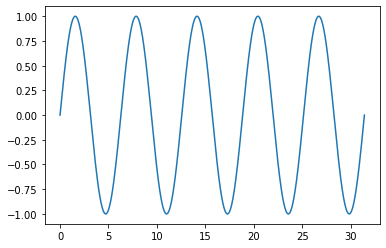

In [122]:
plt.plot(x,y)

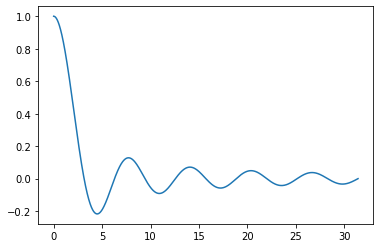

In [123]:
y = np.sin(x[x>0]) / x[x>0]
plt.plot(x[x>0], y)

### Определите, в чем проблема
Исправьте код так, чтобы для этой функции корректно выводился график<br>
Достаточно одной строки!

In [ ]:
# Ваш код

In [ ]:
plt.plot(x,y)
plt.plot(x,0)

## <font color=red>ЗАДАНИЕ</font>

Исправьте эти команды так, чтобы была нарисована асимптота $y = 0$ и они выполнялись корректно для любого размера вектора $x$

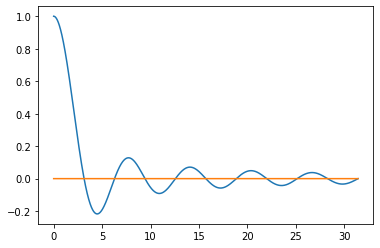

In [126]:
x = x[x>0]
plt.plot(x,y)
plt.plot(x,np.zeros(x.shape[0]))

<font color=blue type=bold>Вопрос.</font> Будет ли корректно выполняться данная операция после выполнения этих операторов. В начале подумайте, а потом проверьте.

```python
    x.reshape((200,1))
    x.reshape((1, 200))
```

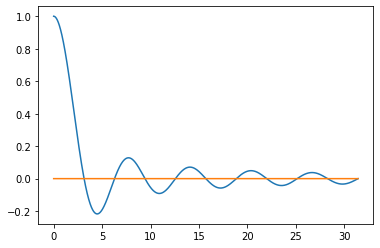

In [127]:
plt.plot(x,y)
plt.plot(x.reshape(-1,1),np.zeros(x.shape[0]))

#### Где здесь ошибка?

In [128]:
N = 10
l = np.logspace(0, N, num = N+1,  base=2.0, endpoint=True)

In [129]:
l = l.astype(int)
l

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [130]:
points = np.linspace(-4*np.pi, 4*np.pi, 100)
x, y = np.meshgrid(points, points)
x[:3,95:]

array([[11.55090632, 11.8047724 , 12.05863847, 12.31250454, 12.56637061],
       [11.55090632, 11.8047724 , 12.05863847, 12.31250454, 12.56637061],
       [11.55090632, 11.8047724 , 12.05863847, 12.31250454, 12.56637061]])

In [131]:
z = np.sqrt(x**2 + y**2)

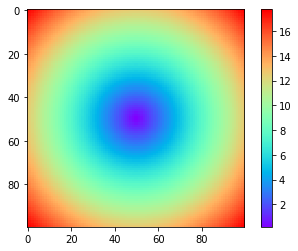

In [132]:
plt.imshow(z, cmap='rainbow')
plt.colorbar()

### Ввод и вывод массивов

In [ ]:
a = np.arange(10)
np.save('my_array', a)

In [ ]:
b = np.load('my_array.npy')
b = b.T
b

In [ ]:
np.savez('new_array.npz', aaa=a, bbb=b)

In [ ]:
xarch = np.load('new_array.npz')

In [ ]:
type(xarch)

In [ ]:
for i in xarch:
    print(i)

In [ ]:
xarch['bbb']

### Линейная алгебра

In [ ]:
import numpy.linalg as linalg

In [ ]:
x = np.arange(1,7).reshape(3,2)
y = np.random.randn(2,3)

In [ ]:
np.dot(x,y)

In [ ]:
np.dot(y,x)

In [147]:
np.NaN == np.NaN

False

#### Какая ось должна стоять в shape? Почему?

In [ ]:
np.dot(x, np.eye(x.shape[1]))

In [ ]:
X = np.random.randn(5,5)

In [ ]:
mat = X.T.dot(X)

In [ ]:
linalg.inv(mat)

In [ ]:
mat.dot( linalg.inv(mat))

## <font color=red>ЗАДАНИЕ</font>

* посмотрите документацию на _linalg.solve_
* создайте случайную матрицу $A$ 5х5 и случайный целочисленный вектор $b$ длиной 5
* решите с её помощью уравнение $A\overrightarrow{x}=\overrightarrow{b}$

In [144]:
np.linalg.solve?

A = np.random.randn(5,5)
b = np.random.randint(10, 50, size=(5))

x = np.linalg.solve(A,b)
np.dot(A,x)

array([32., 29., 21., 27., 43.])

In [143]:
b

array([30, 12, 49, 34, 24])

### Случайные массивы

In [148]:
x = np.random.normal(size=(4,4))

In [149]:
np.random.seed(1024)

In [150]:
x = np.arange(10)
np.random.permutation(x)

array([2, 3, 7, 0, 6, 8, 5, 4, 9, 1])

In [151]:
x = np.random.randint(10,20, size=(3,3))
x

array([[13, 12, 10],
       [17, 18, 19],
       [19, 17, 11]])

### Итерация по массивам

In [152]:
for i in np.nditer(x):
    print(i, ' ', end = '')
print()

13  12  10  17  18  19  19  17  11  


## Важные операции

### reshape + newaxis

### Слияния

In [153]:
a = np.arange(12).reshape(-1,1)
b = np.arange(12).reshape(-1,1)
a.shape, b.shape

((12, 1), (12, 1))

In [154]:
b

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [155]:
x = np.concatenate((a,b), axis=1)
x

array([[ 0,  0],
       [ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 7,  7],
       [ 8,  8],
       [ 9,  9],
       [10, 10],
       [11, 11]])

In [156]:
np.append(b, [1,2,3])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3])

In [162]:
np.stack?

### Широковещятельные операции

In [163]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.arange(9).reshape(3,3)

In [164]:
a + 7

array([ 8,  9, 10])

In [165]:
c + 7

array([[ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [166]:
a + b

array([5, 7, 9])

In [167]:
c + a

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11]])

In [168]:
a.T + c

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11]])

```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

In [169]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

### Сортировка / сортировка по аргументам

In [170]:
a = np.random.randn(10)
a

array([ 0.86407349,  0.20170137, -1.87529904, -0.56850693, -0.06510141,
        0.80681666, -0.5778176 ,  0.57306064, -0.33667496,  0.29700734])

In [171]:
np.argsort(a)

array([2, 6, 3, 8, 4, 1, 9, 7, 5, 0])

In [172]:
a.sort()
a

array([-1.87529904, -0.5778176 , -0.56850693, -0.33667496, -0.06510141,
        0.20170137,  0.29700734,  0.57306064,  0.80681666,  0.86407349])

In [173]:
a = np.random.randn(3,3)
a

array([[-0.37480416,  0.15510474,  0.70485719],
       [ 0.8452178 , -0.65818079,  0.56810558],
       [ 0.51538125, -0.61564998,  0.92611427]])

In [174]:
a.sort(axis=1)
a

array([[-0.37480416,  0.15510474,  0.70485719],
       [-0.65818079,  0.56810558,  0.8452178 ],
       [-0.61564998,  0.51538125,  0.92611427]])

## <font color=red>ЗАДАНИЕ</font>

Есть зашумленная функция:

In [216]:
def f(x):
    N = 200
    A = 1 / np.sqrt(2)
    B = 2
    sigma = 0.3
    mu = 0.05
    
    y = A * x +  np.sin ( A * np.sqrt(x) + B * x ** 0.6) - 2
    return y + sigma * np.random.randn(N) + mu

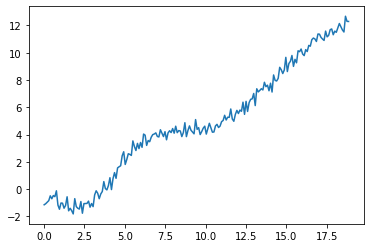

In [217]:
x = np.linspace(0.01, 6*np.pi, 200)
y = f(x)
plt.plot(x, y)

Надо апроксимировать эту функцию функцией вида: <br>
$$ y = w_1 x + w_0$$
<br>Для поиска решения воспользуйтесь аналитическим решением уравнения линейной регрессии:<br><br>
$$\overrightarrow{w} = (X^{T}X)^{-1}X^{T}\overrightarrow{y}$$
<br>
где:
* $X$ - матрица входных данных
* $\overrightarrow{y}$ - вектор выходных данных
* $\overrightarrow{w}$ - вектор коэффициентов апроксимирующей функции
<br>

In [229]:
# Ваш код
x = x.reshape((200, 1))
y = y.reshape((200, 1))

X = np.concatenate((x, np.ones((200, 1))), axis=1)

w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[[ 0.73501685]
 [-2.1339903 ]]


### <font color=green>Забегая вперед ...</font>

#### Разберите код ниже. Почему линейная регрессия дала нелинейную функцию?

Попробуйте найти 2 способа превращения кода в обычную линейную регрессию. В обоих случаях можно менять только 1 строку (не считая комментирования других) 

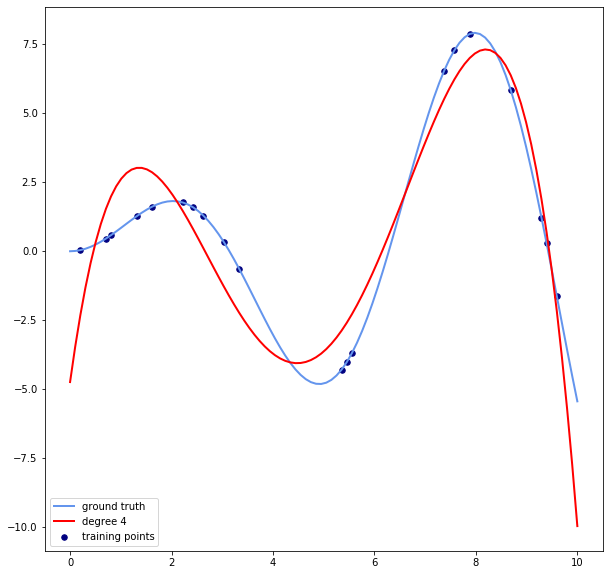

In [176]:
# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

fig = plt.figure(figsize=(10,10))

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, color='red', linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

### Следующее занятие:
* 1 пара - занятие
* 1 пара - коллоквиум

### Повтрить из линейной алгебры:
* поворот и сдвиг матрицы (только стандартными средствами, _np.rotate_, _np.roll_, функции scipy  и т.д. запрещены)
* метод наименьших квадратов
* подумайте о граничных условиях для применения операций между "неподвижной" и сдвинутой / повернутой матрицами
* можно (__нужно?__) заранее написать, оттестировать принести с собой код для решения этих задач для двумерного массива

## Экзаменационные вопросы:

* Массив numpy. Типы индексирования
* numpy. Оптимизированные векторизованные функции и широковещятельные операции (broadcasting)
* Программирование в терминах массивов. Линейная алгебра и случайные массивы.
* numpy. Операции над массивами.

### <font color=blue>К следующему занятию</font>  <font color=red>(коллоквиум)</font> <font color=blue>__обязательно__ повторить numpy и основные конструкции Python</font>
